In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.pyplot

In [ ]:
# def distance(x, y):
#     d = np.abs(x - y).sum()
#     return d

In [ ]:
def distance( x, y):
    d = np.sqrt(((x - y) ** 2).sum())
    return d

Метрика чебышева

In [ ]:
# def distance( x, y):
#     d = np.max(np.abs(x - y))
#     return d

Евклидова метрика

In [ ]:
# def distance( x, y):
#     d = np.sqrt(((x - y) ** 2).sum())
#     return d

In [ ]:
import random
import numpy as np


class Kmean:
    def __init__(self, k):
        self.k = k
        self.means = None
        self.difference = []

    def classification(self, inputs):
        return np.argmin([distance(inputs, self.means[i]) for i in range(len(self.means))])

    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = np.zeros(len(inputs))
        past_means = np.zeros((self.k, 3))
        while True:
            new_assignments = list(map(self.classification, inputs))
            if np.max(abs(self.means - past_means)) < 1:
                return
            else:
                self.difference.append(np.max(abs(self.means - past_means)))
                past_means = np.array(self.means)
                assignments = new_assignments
            for i in range(self.k):
                i_point = [p for p, a in zip(inputs, assignments) if a == i]
                if i_point:
                    self.means[i] = np.mean(i_point, axis=0)
            print(self.means)


In [ ]:
file = r'C:\Users\Andrew\PycharmProjects\grandkursh\source\h.jpg'
img = mpimg.imread(file)
pixels = [pixel for row in img for pixel in row]

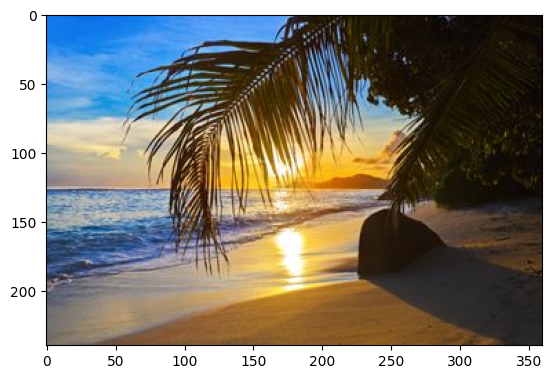

In [ ]:
plt.imshow(img)

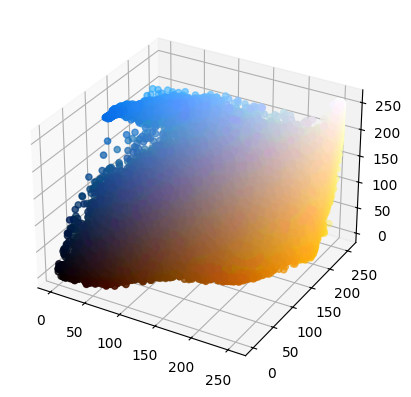

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = []
y = []
z = []
for i in pixels:
    x.append(i[0])
    y.append(i[1])
    z.append(i[2])
ax.scatter(x, y, z, c=np.array(pixels) / 255)
plt.show()

In [ ]:
def recolor(pixel):
    cluster = clusterer.classification(pixel)
    return clusterer.means[cluster]

In [ ]:
clusterer = Kmean(8)
clusterer.train(pixels)

new_img = np.array([[np.around(recolor(pixel)).astype(int) for pixel in row] for row in img])

[array([114.66307506, 109.48244552,  96.68159806]), array([83.70090509, 78.85643112, 68.563813  ]), array([125.36709436, 112.38923584,  90.78676053]), array([120.99897341, 128.91007083, 130.40098553]), array([127.5296086 , 113.37436625,  91.55769621]), array([73.93502998, 66.7428117 , 53.72659978]), array([116.47961509, 106.89862412,  87.61787794]), array([109.08236781, 110.34569202, 104.24720876])]
[array([117.56355932, 106.3940678 , 100.54237288]), array([92.32344828, 78.60252874, 68.4445977 ]), array([143.21715818, 100.47184987,  51.39276139]), array([150.47531528, 167.10248639, 176.47215433]), array([191.15659371, 145.07034738,  66.68180333]), array([42.42149163, 32.20631736, 18.48240083]), array([132.30330477,  92.05997552,  47.96425949]), array([ 85.39685393,  99.29348315, 123.46022472])]
[array([132.40540541, 120.47926375, 110.9499068 ]), array([82.66453885, 68.84459608, 58.41294299]), array([154.87702773, 105.31658817,  44.82914704]), array([154.99478677, 175.00286493, 188.8850

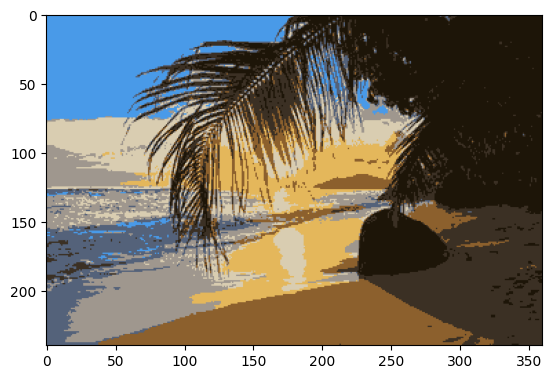

In [ ]:

plt.imshow(new_img)
plt.show()

In [ ]:
print(np.around(clusterer.means).astype(int))

[[159 151 142]
 [ 84  98 122]
 [140  96  45]
 [217 205 177]
 [228 183  91]
 [ 29  21   8]
 [ 59  48  36]
 [ 73 154 232]]


SSE--> 2094.6300104352254
40


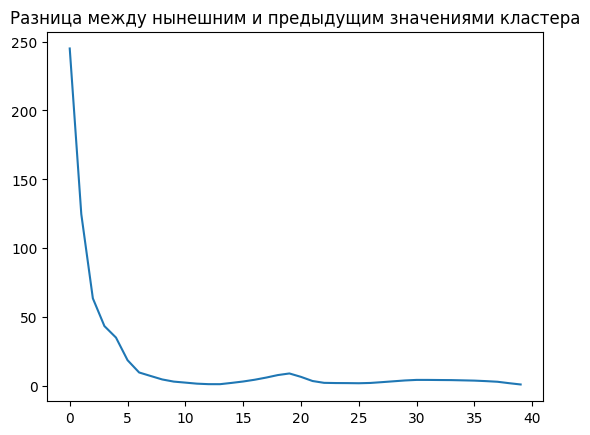

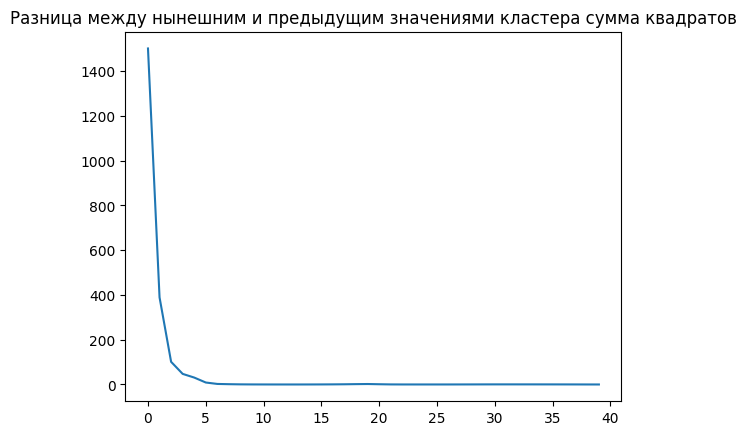

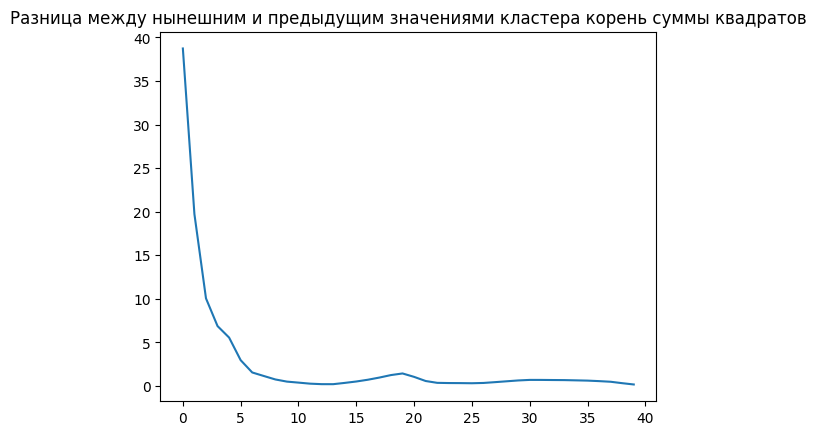

In [ ]:
MSE = [(i ** 2) / len(clusterer.difference) for i in clusterer.difference]
RMSE = np.sqrt(MSE)
print('SSE-->', np.sum(MSE))
print(len(clusterer.difference))
plt.plot(clusterer.difference)
plt.title("Разница между нынешним и предыдущим значениями кластера")
plt.show()
plt.plot(MSE)
plt.title("Разница между нынешним и предыдущим значениями кластера сумма квадратов")
plt.show()
plt.plot(RMSE)
plt.title("Разница между нынешним и предыдущим значениями кластера корень суммы квадратов")
plt.show()

In [ ]:
pixeloid = [recolor(i) for i in pixels]

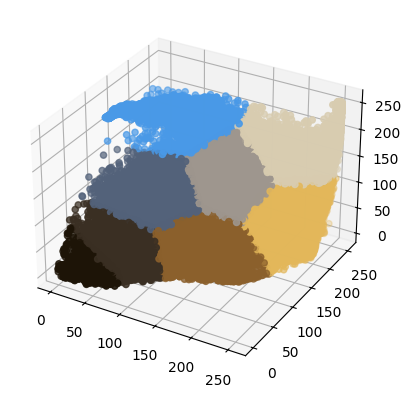

In [ ]:
x_m = []
y_m = []
z_m = []
for i in clusterer.means:
    x_m.append(i[0])
    y_m.append(i[1])
    z_m.append(i[2])

fig = matplotlib.pyplot.figure()
ax2 = fig.add_subplot(projection='3d')

ax2.scatter(x, y, z, c=np.array(pixeloid).astype(int) / 255)
plt.show()

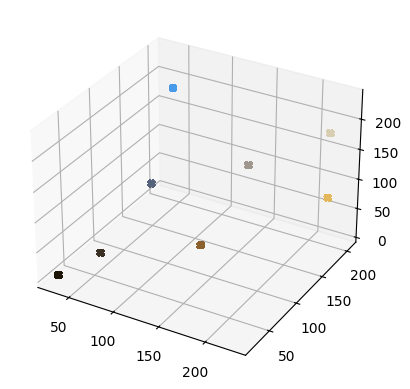

In [ ]:
xx = []
yy = []
zz = []
new=[]
for i in new_img:
    for j in i:
        xx.append(j[0])
        yy.append(j[1])
        zz.append(j[2])
        new.append(j)
ax2 = plt.axes(projection ='3d')
ax2.scatter3D(xx, yy, zz, c=np.array(new).astype(int) / 255, marker='X')
plt.show()

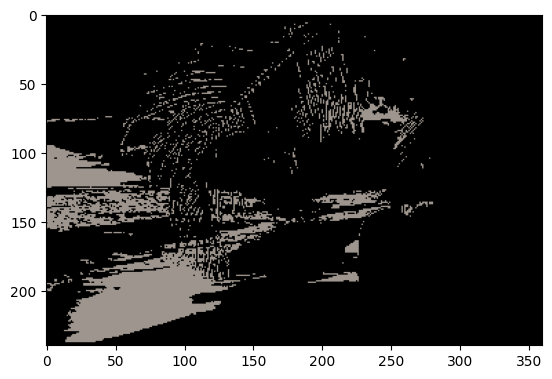

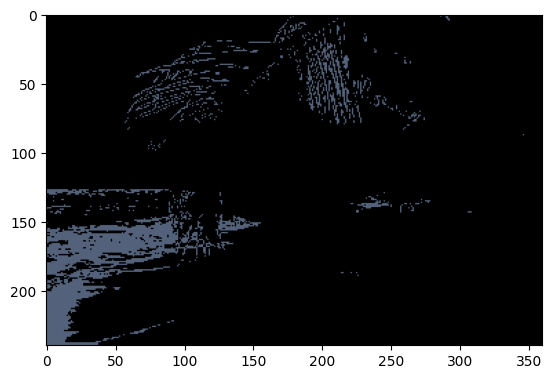

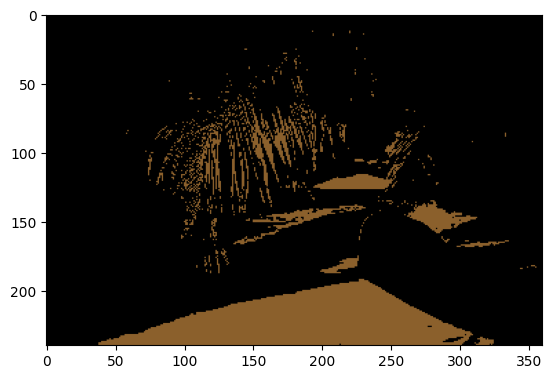

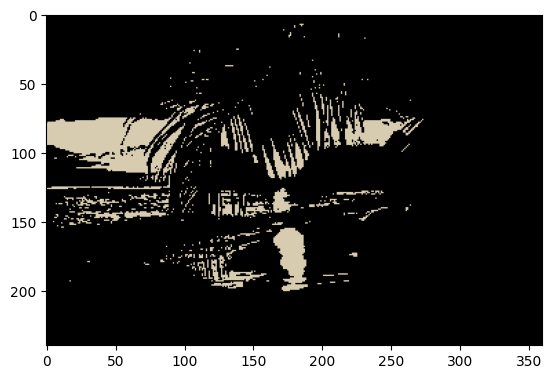

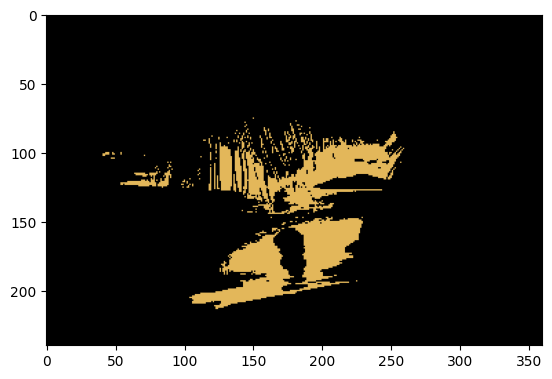

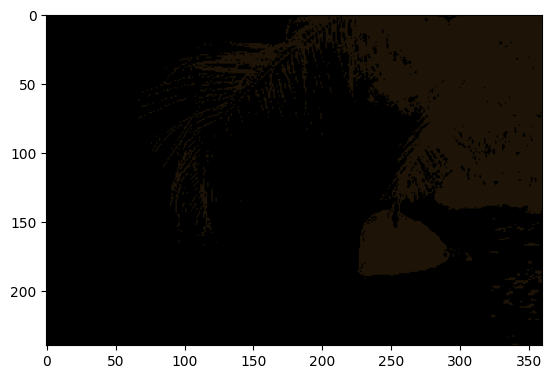

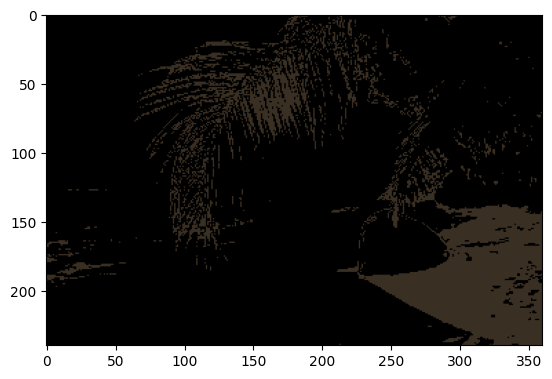

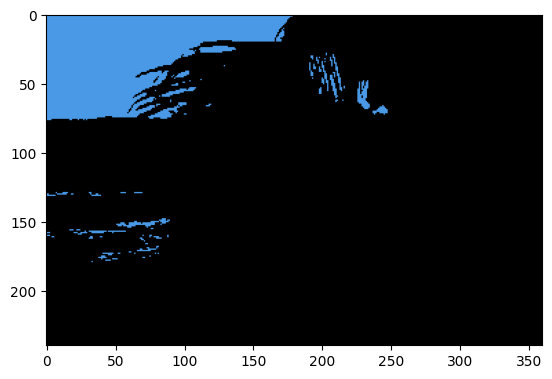

In [ ]:
for i in clusterer.means:
    sec_img = np.array(
        [[(recolor(pixel)).astype(int) if (recolor(pixel) == i).all() else [0, 0, 0] for pixel in row] for row in
        img])
    plt.imshow(sec_img)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# load image from images directory
image = cv2.imread('4.jpg')
print(image)
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3)) # numpy reshape operation -1 unspecified

# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

[[[150 187 113]
  [141 163  85]
  [152 141  61]
  ...
  [ 13  10   6]
  [ 12  10  10]
  [ 13  11  11]]

 [[167 240 190]
  [161 221 167]
  [166 201 137]
  ...
  [ 13   6  11]
  [ 14   7  14]
  [ 52  45  52]]

 [[ 94 241 237]
  [100 239 228]
  [115 238 212]
  ...
  [ 16   0  20]
  [ 39  24  45]
  [106  91 112]]

 ...

 [[171 170 238]
  [171 170 238]
  [167 170 238]
  ...
  [ 54  18  18]
  [111  52  56]
  [124  54  60]]

 [[165 165 249]
  [164 163 243]
  [170 167 239]
  ...
  [ 35   7   6]
  [ 92  42  44]
  [120  56  61]]

 [[162 163 254]
  [158 157 243]
  [169 165 237]
  ...
  [ 23   2   0]
  [ 78  29  31]
  [117  56  60]]]


In [ ]:
#criteria


# Choosing number of cluster
k = 16

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, None, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

KeyboardInterrupt: ignored